# <font color = gree> Analisa dos dados de saída dos funcionários <br>
O projeto tem como objetivo, identificar as
razões de saída dos funcionários da empresa e seus impactos, e indicar
possíveis soluções para esses problemas. A solicitação do relatório foi feita pelo Chief Marketing
Officer (CMO) e o Parceiro de Negócios de Recursos Humanos (HRBP) foi responsável pelo fornecimento dos dados.



## 1. Carregamento dos dados




Importando a biblioteca

In [14]:
import pandas as pd
import numpy as np

Carregando os dados do arquivo .CSV

In [15]:
dados = pd.read_csv('FONTE DE DADOS.xlsx - EXERCISE 8.5.csv')
dados

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,Dados,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Ability to impact,HRBP,Exit survey
4,NaN,Training,11,31,23
5,NaN,Conflict with others,10,11,15
6,NaN,Lack of recognition,9,65,44
7,NaN,Workload,8,14,39
8,NaN,Career advancement,7,137,171
9,NaN,Pay,6,16,24


Os tipos de dados que encontramos no dataset

In [16]:
display(dados.dtypes)

Unnamed: 0    float64
Unnamed: 1     object
Unnamed: 2     object
Unnamed: 3     object
Unnamed: 4     object
dtype: object

Apresentando o formato do dataset

In [17]:
dados.shape

(15, 5)

Ao analisar o dataset percebemos que a coluna 'Unnamed: 0' e algumas linhas estão com valores NaN, que significa Not A Number e é uma das maneiras comuns de representar o valor ausente nos dados, devemos descartar esses campos para obter os resultados desejados.

## Tratamento dos dados

Eliminando a coluna 'Unnamed: 0' e linhas sem valores.

In [18]:
dados.drop('Unnamed: 0', axis = 1, inplace=True)
dados

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN
1,Dados,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,Ability to impact,HRBP,Exit survey
4,Training,11,31,23
5,Conflict with others,10,11,15
6,Lack of recognition,9,65,44
7,Workload,8,14,39
8,Career advancement,7,137,171
9,Pay,6,16,24


Redefinir os índices do DataFrame.

In [19]:
dados.reset_index(drop=True, inplace = True)
dados

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN
1,Dados,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,Ability to impact,HRBP,Exit survey
4,Training,11,31,23
5,Conflict with others,10,11,15
6,Lack of recognition,9,65,44
7,Workload,8,14,39
8,Career advancement,7,137,171
9,Pay,6,16,24


Alterando o nome das colunas e já com a tradução para português.


In [20]:
dados.rename(columns={'Unnamed: 1': 'Dados', 'Unnamed: 2': 'Capacidade de impacto', 'Unnamed: 3': 'HRBP', 'Unnamed: 4': 'Pesquisa de saída'}, inplace=True)
dados

,Dados,Capacidade de impacto,HRBP,Pesquisa de saída
0,NaN,NaN,NaN,NaN
1,Dados,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,Ability to impact,HRBP,Exit survey
4,Training,11,31,23
5,Conflict with others,10,11,15
6,Lack of recognition,9,65,44
7,Workload,8,14,39
8,Career advancement,7,137,171
9,Pay,6,16,24


Excluir as linhas 0, 1, 2, e 3 por não oferecerem nenhum razão para estar no dataset

In [21]:
dados.drop([0,1,2,3], inplace=True)
dados

,Dados,Capacidade de impacto,HRBP,Pesquisa de saída
4,Training,11,31,23
5,Conflict with others,10,11,15
6,Lack of recognition,9,65,44
7,Workload,8,14,39
8,Career advancement,7,137,171
9,Pay,6,16,24
10,Type of work,5,128,78
11,Career change,4,18,30
12,Commute,3,31,22
13,Relocation,2,105,37


Precisamos reindexar novamentos os índices

In [22]:
dados.reset_index(drop=True, inplace = True)
dados

,Dados,Capacidade de impacto,HRBP,Pesquisa de saída
0,Training,11,31,23
1,Conflict with others,10,11,15
2,Lack of recognition,9,65,44
3,Workload,8,14,39
4,Career advancement,7,137,171
5,Pay,6,16,24
6,Type of work,5,128,78
7,Career change,4,18,30
8,Commute,3,31,22
9,Relocation,2,105,37


As informações da coluna 'Dados' vão ser traduzidas também para português.

In [23]:
traducao_coluna_dados = ['Treinamento', 'Conflito com outros', 'Falta de reconhecimento', 'Carga de trabalho', 'Progressão de carreira', 'Salário', 'Tipo de trabalho', 'Mudança de carreira', 'Trajeto', 'Mudança de local', 'Doença']
dados['Dados'] = traducao_coluna_dados
dados

,Dados,Capacidade de impacto,HRBP,Pesquisa de saída
0,Treinamento,11,31,23
1,Conflito com outros,10,11,15
2,Falta de reconhecimento,9,65,44
3,Carga de trabalho,8,14,39
4,Progressão de carreira,7,137,171
5,Salário,6,16,24
6,Tipo de trabalho,5,128,78
7,Mudança de carreira,4,18,30
8,Trajeto,3,31,22
9,Mudança de local,2,105,37


## Conhecendo os dados

Apresentando o formato do dataset

In [24]:
dados.shape

(11, 4)

O dataframe é formado por 11 linhas e 4 colunas.

Verificar o percentual de dados faltantes no nosso dataset

In [25]:
(dados.isnull().sum() / dados.shape[0]).sort_values()

Dados                    0.0
Capacidade de impacto    0.0
HRBP                     0.0
Pesquisa de saída        0.0
dtype: float64

O dataset tem dados em todos os campos e o tipo dos dados são númericos.

Com os dados devidamente tratados, vamos salvar o dataset para realizar gráficos e analises.

In [26]:
dados.to_excel('dados.xlsx', index=False)

## Examinando os dados

Temos o gráfico enviado pelo HRBP, vamos analisar e responder algumas perguntas.

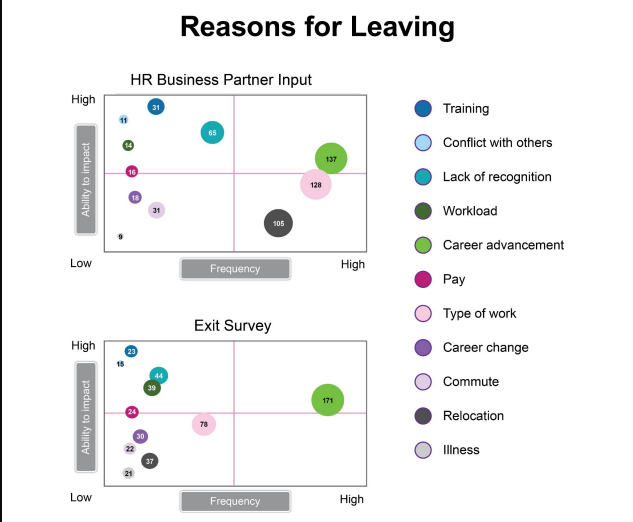

- 1 - O que está sendo mostrado aqui? Escreva um texto explicando os dados.**


Os dois gráficos nos mostram as razões para a saída e a capacidade de impacto, onde no eixo x (horizontal), tem peso na frequência que ocorre a saída e no eixo y (vertial) nos revela o impacto da saída pelo motivo.

Podemos ver que os dois gráficos mostram em frequencia de saídas que a Progressão de carreira é o que lidera, chama a atenção a proximidade dos pontos nos gráficos, indicando que é um motivo que tem a capacidade de impacto 7/11 e está revelando  tem  o tamanho da bolha reflete a quantidade de saídas.

Os dados do Tipo de trabalho e Realocação tem uma diferença considerável entre os dois gráficos, enquanto temos uma alta quantidade no gráfico HR Business Partner Input, temos o oposto no gráfico Exit Survey, e são considerados tendo uma baixa capacidade de impacto na saída.

- 2. Que observações você pode fazer a partir desses dados? Coloque duas
conclusões específicas em palavras. Escreva sentenças completas.


Ações estratégicas no quesito Progressão de carreira deve ser considerada uma forte aliada para solucionar essa evasão de funcionários, pela pesquisa da HRBP e corroborado pela pesquisa de saída, indica uma forte afirmação do que tem sido externado pelos ex-funcionários. <br>

Os dados do tipo de trabalho e realocação trazem a percepção de que a capacidade de impacto está equivocada, mostra que principalmente no gráfico Exit Survey a quantidade é bem relevante para que o impacto seja colocado como 2 e 5 respectivamente.

- 3. O que não é ideal ou poderia ser evitado na visualização em sua forma atual? Que
perguntas você faria ou que feedback daria para quem fez o gráfico?


Nos gráficos a informação Illness é impossível de detectar o tamanho da bolha, porque a cor escolhida é a mesma do fundo, os rótulos poderiam ter a cor da fonte ou de fundo preto, as cores das bolhas, bem como o tamanho dificultam uma comparação mais precisa.
Foram testadas outras formas de apresentar os dados?


- 4. Crie três maneiras diferentes de mostrar esses dados e liste quais são e algumas vantagens e insuficiências de cada uma.

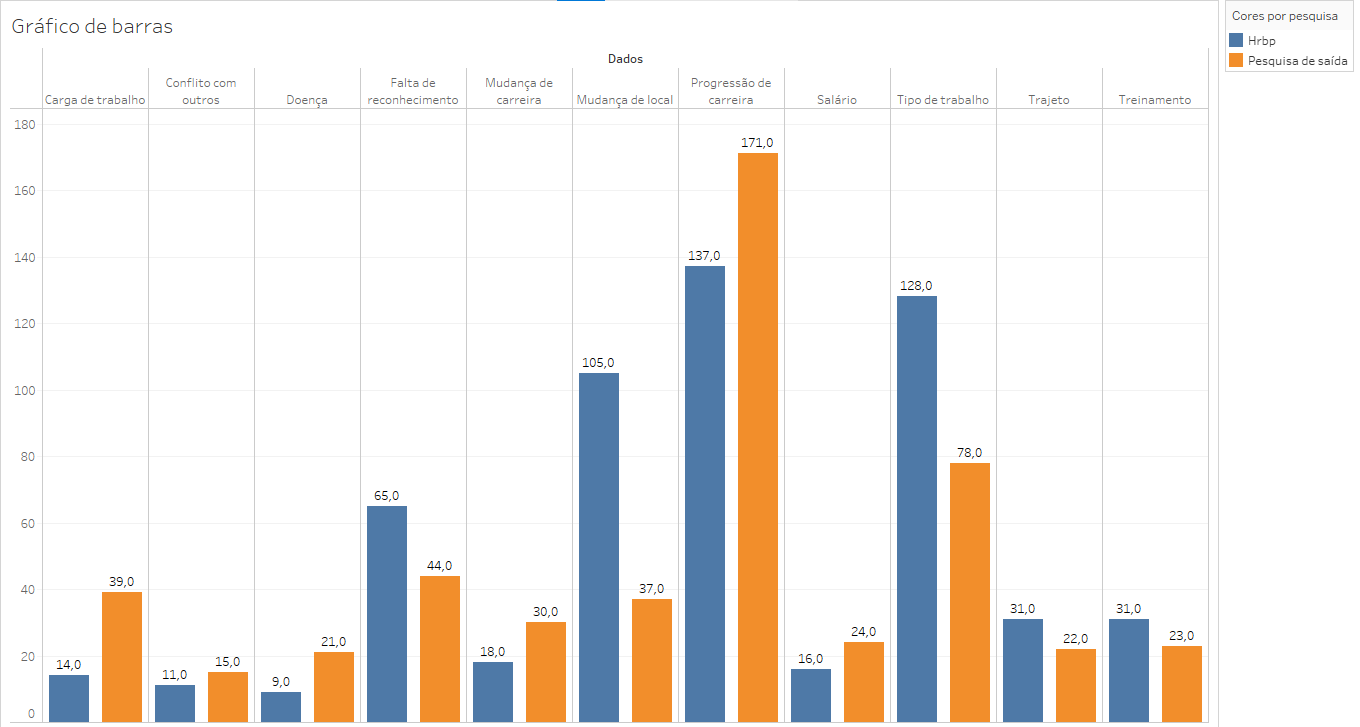

No gráfico de barras lado a lado podemos comparar de forma simples e identificar os maiores motivos para saída de colaboradores (progressão de carreira), porém com essa formato de gráfico não é possível inserir a capacidade de impaco para as saídas.

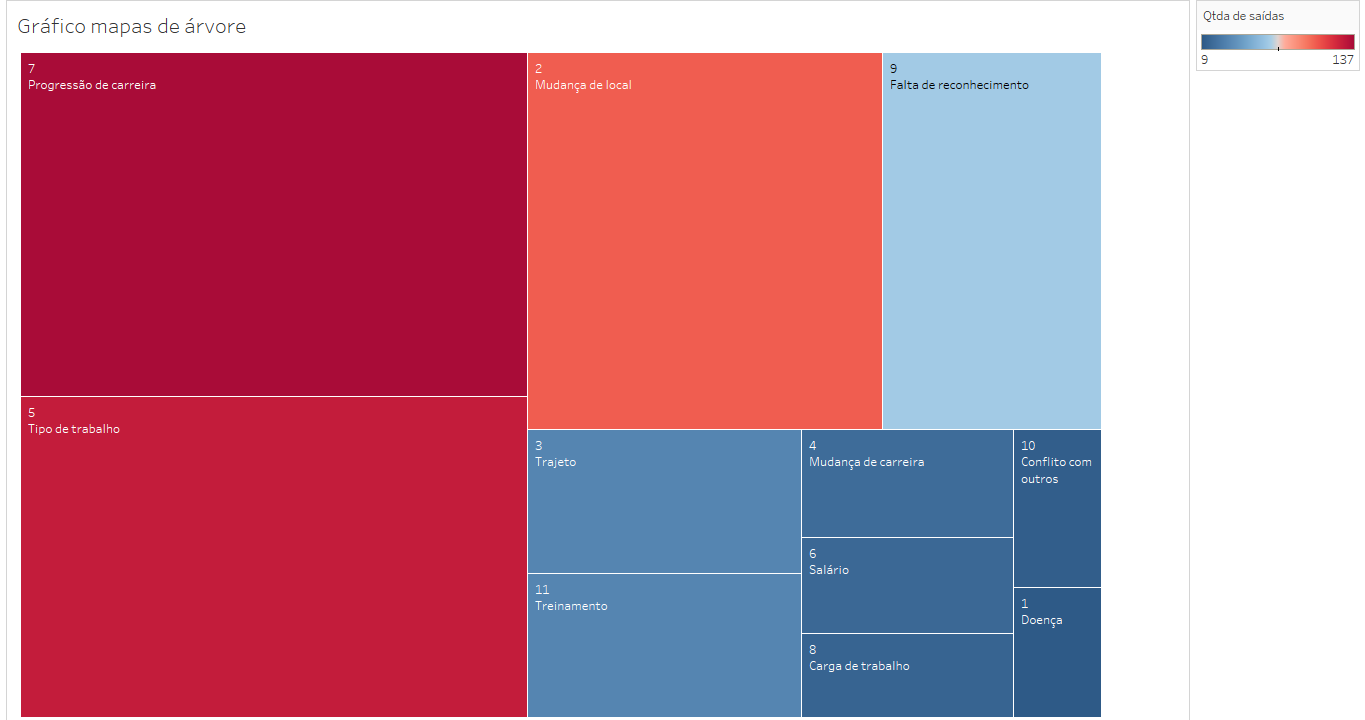

O gráfico mapas de árvore é visualmente atraente, compacta e fácil de ler, permitindo ao usuário discernir padrões e fazer comparações rapidamente a partir dos retangulos, onde podemos observar que progressão de carreira, tipo de trabalho, mudança de local e falta de reconhecimento são os blocos que expresam a maior quantidade de razões de saída de funcionários. A parte de insufiência do gráfico fica pelo quesito espaço e exibição de números ou percentuais de diferença, se tivessemos mais motivos de demissão e com números totais mais próximos, ficaria mais díficil a visualização para determinar facilmente as razões para saída.

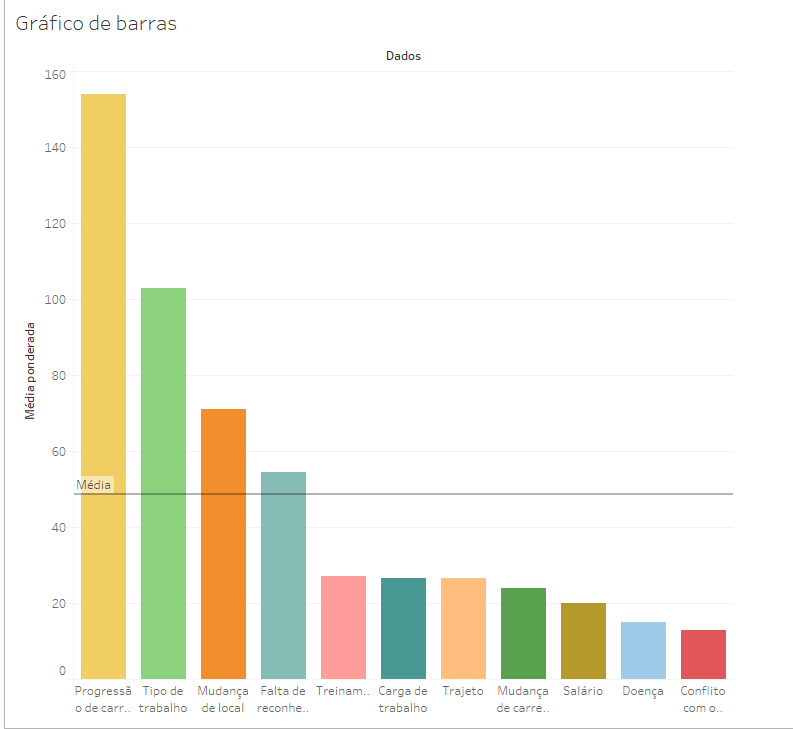

Para a criação do gráfico foi realizado o cálculo da média ponderada, o que leva também em consideração a capacidade de impacto (peso) de cada razão de saída, foi traçada uma linha como a média dos valores para facilitar as razões para saída que ficaram a cima da média, são elas progressão de carreira, tipo de trabalho, mudança de local e falta de reconhecimento.

- 5. Qual visualização representa melhor os dados e por quê?


O último gráfico apresentado (barras), porque é de fácil visualização e comparação dos resultados, além de que ele é o mais completo por utilizar um cálculo de média ponderada, que leva em consideração a capacidade de impacto, para facilitar a leitura, ainda foi inserido a linha que traça a média, buscando deixar a leitura o mais rápido e simples possível.

- 6. Como você pode gerar essas informações em uma história orientada por dados
para seu chefe? O objetivo é pensar além de mostrar simplesmente dados e mostrar
o contexto da história.

Os gráficos apresentados ilustram bem onde devemos intensificar as forças para diminuir a rotatividade e perca de talentos na organização.

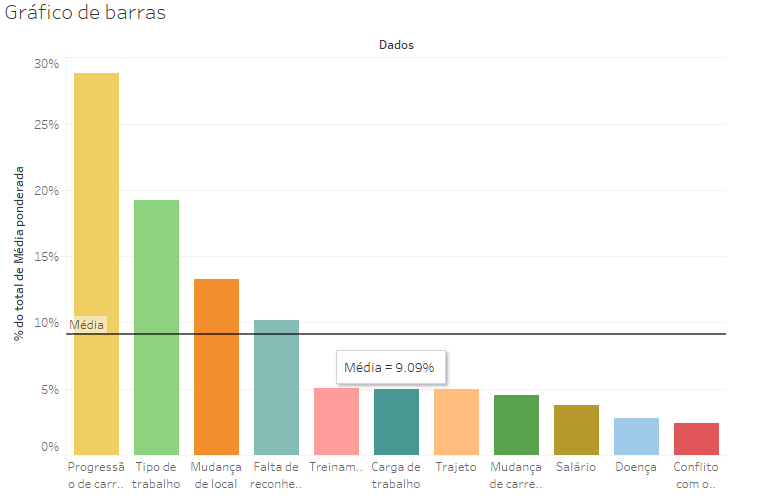

Se pegarmos os valores que estão a cima da média, eles correspondem a 71.56% das razões de saída da empresa, quem lidera essa rotatividade é a progressão de carreira, é preciso rever o atual plano de carreira ou criar um que possa incentivar os colaboradores a seguir na empresa, com visão clara das oportunidades de crescimento e formação de líderes.

Em 2ª lugar com 19.27% das saídas está o tipo de trabalho, quais caminhos podemos seguir para diminuir a rotatividade nesse quesito? É reforça durante as entrevistas de admissão as atribuições do cargo? O ambiente de trabalho está com processos definidos e ações para melhorar o bem-estar dos funcionários? São questões que precisam ser debatidas para melhorar esse indicador.

A mudança de local é fica no top 3ª de motivos de saída com 13.28%, a alteração do local de trabalho está sendo conduzida buscando a adaptabilidade do colaborar a esse novo ambiente? Um plano de onboarding com prazos, detalhes e recursos necessários e o responsável por cada etapa na adaptação do colaborador no novo ambiente poderia auxiliar na redução dessas saídas.

Um pouco acima da média pondera ficou a falta de reconhecimento com 10.20% do total de razões para saída, é um motivo que também pode ser visto junto a progressão de carreira, mas nesse caso podemos agir com outras ações para combater essa rotatividade e também impacta diretamente na produtividade, sugiro dar visibilidade na empresa sobre um bom trabalho feito por um colaborador, estimular a competição saudável através da gamificação e metas possíveis como forma de treinar os funcionários, ao mesmo tempo em que coloca um ranking com as melhores pontuações e avaliar e melhorar as ações em curso.

## Conclusão

Os dados mostram que 4 razões para saída requerem maior atenção por correspondem a 71.56% do total, o relatório buscou mostrar onde a organização tem que intensificar as ações para ter uma redução da rotatividade e um ganho de produtividade, com menos despesas trabalhistas e maior ganho na força de trabalho através de funcionários motivados.